# Ciência de Dados Aplicada aos Dados Abertos da UFOP

por Rian Lucas Dias Guedes

<img src = "icea.png">

Imagem tirada por Helbert Igor Almeida

## Introdução

Desde que estabelecida em 2011, a Lei 12.527 garante aos cidadãos brasileiros o acesso às informações públicas dos órgãos e instituições governamentais em todas as esferas.  De acordo com a referida legislação, algumas informações  podem  ser  requeridas  por  meio  de  Sistemas de Informações aos Cidadãos enquanto  outras são disponibilizadas a  priori em  serviços  de transparência de  informações. 

Nesse  caso,  um  dos  mecanismos  da  Universidade  Federal  de  Ouro  Preto  para  prover transparência é o Portal UFOP Dados Abertos. Nele foram organizados conjuntos de dados agrupados como: Administração,  Institucional,  Planejamento,  Gestão  de  Pessoas,  Assistência Estudantil,  Graduação,  Extensão,  Pesquisa  e  Pós - Graduação.  Contudo,  indo de  encontro  com  a  própria  natureza  de  dados,  os  dados  disponibilizados nesse Portal estão em estado bruto,  ou seja,  em forma de tabelas as quais a correlação,  a  análise e  visualização  das  informações não é intuitiva.

Nesse sentido,  o objetivo desse projeto é utilizar Ciência de Dados para identificar insights  a  respeito  das  intersecções  entre  os  conjuntos  de  dados  abertos  de assistência  estudantil com  extensão,  pesquisa  e  pós-graduação  da  UFOP.  Logo, a metodologia empregará  como procedimento metodológico o estudo de caso combinado com as técnicas de Ciência de Dados.  Como resultados espera-se revelar a influência das ações de assistência estudantil para o desenvolvimento da extensão e da pesquisa na UFOP pelos discentes beneficiados.

## Sobre o Estudo

O objetivo dessa Iniciação Científica é utilizar a Ciência de Dados para identificar ideias a respeito das intersecções entre os conjuntos de dados disponibilizados no Portal de dados abertos da Universidade Federal de Ouro Preto (UFOP) para entender o comportamento e influência da assistência estudantil ao longo dos anos em relação aos beneficiados.

[Clique no link para acessar o portal](http://dados.ufop.br/)

O Portal de dados abertos apresenta 56 conjuntos de dados disponibilizados em oito categorias:
1. Administração
2. Assistência Estudantil
3. Extensão
4. Pesquisa e Pós-Graduação
5. Graduação
6. Institucional
7. Planejamento
8. Gestão de Pessoas

<div class="alert alert-block alert-info"
     <b> O estudo de caso abordará as categorias Assistência Estudantil, Extensão e Pesquisa e Pós-Graduação </b>
</div>

## Questões Norteadoras a serem respondidas

1. Em quais tipos de projetos (entre os de pesquisa e os de extensão) os discentes beneficiados com programas de assistência estudantil da UFOP têm maior participação?


2. Qual modalidade de participação nos projetos de extensão (bolsista ou voluntário) os discentes beneficiados com programas de assistência estudantil da UFOP têm maior participação?


3. Os discentes beneficiados com programas de assistência estudantil também ingressam nos programas de pós-graduação?

<div class="alert alert-block alert-info"
     <b> De dezoito conjuntos de dados a serem analisados, foram descartados nove conjuntos devido á falta de informações sobre os beneficiados de assistência estudantil na Universidade. </b>
</div>

<img src = "icea1.png">

Imagem tirada por Bruna Lima de Mello

## Importação de Bibliotecas

Algumas bibliotecas fazem parte da Ciência de Dados e é o primeiro passo para qualquer projeto. Logo:


In [1]:
#Importando bibliotecas para o Teste Piloto
import pandas as pd #biblioteca de dataframe 
%matplotlib inline 
import matplotlib.pyplot as plt #Para plotagem e confecção de gráficos
import random #Para criar a funcionalidade de sorteio aleatório
import numpy as np #Para cálculos matriciais 
import csv #para forçar a leitura de arquivos csv
import seaborn as sns #para estética dos gráficos da biblioteca matplotlib

## Limpeza de Dados

A limpeza de dados é o processo de purificar um conjunto de registros, tabela ou banco de dados, a fim de detectar e corrigir registros corrompidos ou imprecisos. Esse processo envolve a identificação de partes dos dados que estejam incompletas, incorretas, imprecisas ou irrelevantes, para que possam ser substituídas, modificadas ou excluídas. A limpeza de dados pode ser feita por meio de ferramentas de manipulação de dados, que permitem a interação com os dados de forma dinâmica, ou por meio de processamento em lote, utilizando scripts ou um firewall de qualidade de dados para automatizar o processo.

### Arquivo CSV

In [2]:
#Leitura dos arquivos CSV 
path = "bolsistas_ic.csv" 
path_um = "bolsa_renumerada.csv"
path_dois = "projetos_pesquisa.csv"
path_tres = "alunos_pos_graduacao.csv"
path_quatro = "voluntarios.csv"
path_cinco = "bolsistas.csv"
path_seis = "bolsistas-alimentacao.csv"
path_sete = "bolsistas-transporte.csv"
path_oito = "moradia.csv"

In [3]:
# Conversão de arquivos CSV para o padrão UTF-8
df = pd.read_csv(path, sep=';', encoding='UTF-8') 
df_um = pd.read_csv(path_um, sep=';', encoding='UTF-8')
df_dois = pd.read_csv(path_dois, sep=';', encoding='UTF-8')
df_tres = pd.read_csv(path_tres, sep=';', encoding='UTF-8')
df_quatro = pd.read_csv(path_quatro, sep=';', encoding='UTF-8')
df_cinco = pd.read_csv(path_cinco, sep=';', encoding='UTF-8')
df_seis = pd.read_csv(path_seis, sep=';', encoding='UTF-8')
df_sete = pd.read_csv(path_sete, sep=';', encoding='UTF-8')
df_oito = pd.read_csv(path_oito, sep=';', encoding='UTF-8')

<div class="alert alert-block alert-warning"
     <b> UTF - 8 é o formato padrão para o Brasil em relação ao manuseio de dados. </b>
</div>

In [4]:
# Descartando colunas com valor nulo para evitar erros
df.dropna(inplace = True)
df_um.dropna(inplace = True)
df_dois.dropna(inplace = True)
df_tres.dropna(inplace = True)
df_quatro.dropna(inplace = True)
df_cinco.dropna(inplace = True)
df_seis.dropna(inplace = True)
df_sete.dropna(inplace = True)
df_oito.dropna(inplace = True)

In [5]:
#Inserindo coluna para contagem para facilitar nas análises
df['Contagem'] = 1
df_um['Contagem'] = 1
df_dois['Contagem'] = 1
df_tres['Contagem'] = 1
df_quatro['Contagem'] = 1
df_cinco['Contagem'] = 1
df_seis['Contagem'] = 1
df_sete['Contagem'] = 1
df_oito['Contagem'] = 1

### Conjunto de Dados Bolsistas de Iniciação Científica 

Conjunto de dados que apresenta dados sobre alunos da Universidade Federal de Ouro Preto que realizaram ou realizam Iniciação Científica. Os dados apresentados são o nome do aluno, o curso de graduação, o nome do programa, data de início do projeto, nome do orientador, departamento em que o aluno é alocado, a linha de pesquisa do projeto, número identificador da Iniciação Científica, o título, a agência de fomento vinculada e o tipo de aluno (se é bolsista ou voluntário).

In [6]:
df

,bolsista,curso_bolsista,programa,ano,orientador,setor,linha_pesquisa,id_projeto,título,fomento,tipo_bolsa,Contagem
1,ALINE TONHELA FERRAZ,FARMACIA,PROGRAMA DE BOLSAS DE INICIAÇÃO CIENTÍFICA E T...,2017,PAULA MELO DE ABREU VIEIRA,DECBI,OBJETIVOS: NESTA LINHA DE PESQUISA TEMOS COMO ...,2487,Quantificação do parasistismo no trato gastroi...,FAPEMIG,BOLSISTA,1
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,PROGRAMA INSTITUCIONAL DE VOLUNTÁRIOS DE INICI...,2017,HARRISON BACHION CERIBELI,DECEG,EMENTA: MÚLTIPLAS DIMENSÕES DO PROCESSO ESTRAT...,2626,Produtos e serviços turísticos para a criança ...,UFOP,VOLUNTÁRIO,1
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,PROGRAMA INSTITUCIONAL DE VOLUNTÁRIOS DE INICI...,2017,LUCCAS ASSIS ATTILIO,DECEG,EMENTA: O OBJETIVO DESSA LINHA DE PESQUISA É D...,2774,Financeirização e crescimento econômico brasil...,UFOP,VOLUNTÁRIO,1
4,ANA CAROLINA DA SILVA,TURISMO,PROGRAMA INSTITUCIONAL DE VOLUNTÁRIOS DE INICI...,2017,MARCELO VIANA RAMOS,DETUR,GESTÃO E PLANEJAMENTO DO TURISMO,3200,URBANIZAÇÃO TURÍSTICA NO CONTEXTO DOS MEGA-EVE...,UFOP,VOLUNTÁRIO,1
5,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,PROGRAMA INSTITUCIONAL DE VOLUNTÁRIOS DE INICI...,2017,GUSTAVO PEIXOTO SILVA,DECOM,ESTA LINHA OBJETIVA O DESENVOLVIMENTO DE TÉCNI...,2726,Otimização de Redes de Transporte Público,UFOP,VOLUNTÁRIO,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,PROGRAMA INSTITUCIONAL DE BOLSAS DE INICIAÇÃO ...,2021,MARCO ANTONIO MELO FRANCO (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR EM DIFERENTES ESP...,7722,COVID-19 E ESCOLARIZAÇÃO: O QUE MUDA NO PROCES...,CNPQ,BOLSISTA,1
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR AS DIVERSAS PRÁTI...,7063,Contribuições da Metodologia de Produções Narr...,UFOP,BOLSISTA,1
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR AS DIVERSAS PRÁTI...,7063,Contribuições da Metodologia de Produções Narr...,UFOP,BOLSISTA,1
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,ANELISE FONSECA DUTRA (DELET),DELET,ESTA LINHA INCORPORA A LINGUÍSTICA APLICADA EM...,7045,Teletandem: o desenvolvimento da competência i...,UFOP,BOLSISTA,1


In [7]:
df.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 1 to 3790
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bolsista        3581 non-null   object
 1   curso_bolsista  3581 non-null   object
 2   programa        3581 non-null   object
 3   ano             3581 non-null   int64 
 4   orientador      3581 non-null   object
 5   setor           3581 non-null   object
 6   linha_pesquisa  3581 non-null   object
 7   id_projeto      3581 non-null   int64 
 8   título          3581 non-null   object
 9   fomento         3581 non-null   object
 10  tipo_bolsa      3581 non-null   object
 11  Contagem        3581 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 363.7+ KB


In [8]:
df.shape #Tamanho da base de dados: número de linhas e número de colunas

(3581, 12)

In [9]:
df.columns #Saber o nome das colunas

Index(['bolsista', 'curso_bolsista', 'programa', 'ano', 'orientador', 'setor',
       'linha_pesquisa', 'id_projeto', 'título', 'fomento', 'tipo_bolsa',
       'Contagem'],
      dtype='object')

In [10]:
df['tipo_bolsa'].replace("VOLUNTARIO", "VOLUNTÁRIO", inplace=True) # alterando valores da coluna tipo_bolsa

In [11]:
#removendo colunas que não serão usadas
df.drop(['programa','orientador','linha_pesquisa', 'id_projeto', 'título'], axis=1, inplace=True) 

In [12]:
df.columns = ['Bolsista','Curso','Ano','Departamento','Fomento','Tipo de Aluno','Contagem'] #Renomeando colunas

In [13]:
def categorizar_departamento(Departamento): #Função para categorizar os departamentos em Unidades
    if Departamento == "DEEGEP"or Departamento =="DEETE":
        return 'CEAD'
    elif Departamento == "DEENP" or Departamento =="DEELT" or Departamento =="DECSI" or Departamento =="DECEA":
        return 'ICEA'
    elif Departamento == "DECAD" or Departamento =="DECSO" or Departamento =="DEECO" or Departamento =="DEJOR" or Departamento =="DESSO":
        return 'ICSA'
    elif Departamento == "DEART" or Departamento =="DEFIL" or Departamento =="DEHIS" or Departamento =="DELET":
        return 'ICHS'
    elif Departamento == "DEDIR" or Departamento =="DEMUL" or Departamento =="DETUR":
        return 'EDTM'
    elif Departamento == "DEEFD":
        return 'EEF'
    elif Departamento == "DEACL" or Departamento =="DEFAR":
        return 'EFAR'
    elif Departamento == "DEAMB" or Departamento =="DEARQ" or Departamento =="DECAT" or Departamento =="DEMEC" or Departamento =="DECIV" or Departamento =="DEGEO" or Departamento =="DEMET" or Departamento =="DEMIN" or Departamento =="DEPRO" or Departamento =="DEURB":
        return 'EMINAS'
    elif Departamento == "DECPG" or Departamento =="DECPA" or Departamento =="DEMSC":
        return 'EMED'
    elif Departamento == "DEALI" or Departamento =="DENCS":
        return 'ENUT'
    elif Departamento == "DECOM" or Departamento =="DEFIS" or Departamento =="DEQUI" or Departamento =="DECBI" or Departamento =="DEBIO" or Departamento =="DEEMA" or Departamento =="DEEST" or Departamento =="DEMAT":
        return 'ICEB'
    else:
        return 'IFAC'

In [14]:
 df['Unidade'] = df['Departamento'].apply(categorizar_departamento) #aplicação da função acima

In [15]:
df

,Bolsista,Curso,Ano,Departamento,Fomento,Tipo de Aluno,Contagem,Unidade
1,ALINE TONHELA FERRAZ,FARMACIA,2017,DECBI,FAPEMIG,BOLSISTA,1,IFAC
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC
4,ANA CAROLINA DA SILVA,TURISMO,2017,DETUR,UFOP,VOLUNTÁRIO,1,IFAC
5,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,2017,DECOM,UFOP,VOLUNTÁRIO,1,IFAC
...,...,...,...,...,...,...,...,...
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,2021,DEEDU,CNPQ,BOLSISTA,1,IFAC
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,DEEDU,UFOP,BOLSISTA,1,IFAC
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,2021,DEEDU,UFOP,BOLSISTA,1,IFAC
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS


### Conjunto de Dados Bolsas Renumeradas


Conjunto de dados que apresentam dados de todos os alunos da Universidade Federal de Ouro Preto que receberam ou recebem alguma bolsa de assistência estudantil para a garantia de condições socioeconômicas durante a jornada universitária. Os dados são o nome do bolsista, o nome do curso, o tipo de bolsa que é contemplado, a data inicial e final do recebimento da bolsa.

In [16]:
df_um

,nome,Código curso,descricao/bolsa,data_inicio,data_fim,Contagem
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,AUXILIO MORADIA - JM,2013,2015.0,1
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,AUXILIO MORADIA - JM,2013,2013.0,1
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,AUXILIO MORADIA - JM,2013,2016.0,1
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0,1
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0,1
...,...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,BOLSA PERMANENCIA,2016,2019.0,1
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,BOLSA PERMANENCIA,2016,2019.0,1
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,BOLSA PERMANENCIA,2016,2019.0,1
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,BOLSA PERMANENCIA,2016,2019.0,1


In [17]:
df_um.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34719 entries, 0 to 35172
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome             34719 non-null  object 
 1   Código curso     34719 non-null  object 
 2   descricao/bolsa  34719 non-null  object 
 3   data_inicio      34719 non-null  int64  
 4   data_fim         34719 non-null  float64
 5   Contagem         34719 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.9+ MB


In [18]:
df_um.shape #Tamanho da base de dados: número de linhas e número de colunas

(34719, 6)

In [19]:
df_um.columns #Saber o nome das colunas

Index(['nome', 'Código curso', 'descricao/bolsa', 'data_inicio', 'data_fim',
       'Contagem'],
      dtype='object')

In [20]:
df_um.columns = ['Bolsista','Curso','Categoria da Bolsa','Data de Inicio','Data Fim','Contagem'] #Renomeando colunas

In [21]:
# Alterando os valores de Categoria da Bolsa para limpeza de dados
df_um['Categoria da Bolsa'].replace("AUXILIO MORADIA - JM", "MORADIA", inplace=True)
df_um['Categoria da Bolsa'].replace("AUXILIO MORADIA MEDIDA PROTETIVA", "MORADIA", inplace=True) 
df_um['Categoria da Bolsa'].replace("BIDA-INCENTIVO DESENV. ACADEMICO", "BIDA", inplace=True)
df_um['Categoria da Bolsa'].replace("BOLSA AUXILIO MORADIA - REFORMA MA", "MORADIA", inplace=True)
df_um['Categoria da Bolsa'].replace("BOLSA COMPLEMENTO RU", "RU", inplace=True)
df_um['Categoria da Bolsa'].replace("BOLSA INTEGRAL RU", "RU", inplace=True)
df_um['Categoria da Bolsa'].replace("BOLSA PARCIAL RU", "RU", inplace=True)
df_um['Categoria da Bolsa'].replace("BOLSA PARCIAL RU COM TICKET", "RU", inplace=True)
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA", "PERMANENCIA", inplace=True)
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA MEC", "PERMANENCIA", inplace=True)
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA QUILOMBOLA", "PERMANENCIA", inplace=True)
df_um['Categoria da Bolsa'].replace("BOLSA PIDIC PRACE", "PIDIC", inplace=True)
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/NEI", "DESENVOLVIMENTO", inplace=True)
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE", "DESENVOLVIMENTO", inplace=True) 
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE - 15HS", "DESENVOLVIMENTO", inplace=True)
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE - 20HS", "DESENVOLVIMENTO", inplace=True)
df_um['Categoria da Bolsa'].replace("EXTENSÃƒO PRACE 2018", "EXTENSÃO", inplace=True)
df_um['Categoria da Bolsa'].replace("EXTENSÃO PRACE 2018", "EXTENSÃO", inplace=True)
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL AQUISI??O", "INCLUSÃO DIGITAL", inplace=True)
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL AQUISI??O PCD", "INCLUSÃO DIGITAL", inplace=True)
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL MANUTEN??O", "INCLUSÃO DIGITAL", inplace=True)
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL MANUTEN??O PCD", "INCLUSÃO DIGITAL", inplace=True)
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL PRACE BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True)
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL PRACE N?O BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True)
df_um['Categoria da Bolsa'].replace("INCLUSÃO DIGITAL PRACE BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True)
df_um['Categoria da Bolsa'].replace("INCLUSÃO DIGITAL PRACE NÃO BOLSISTA AC", "INCLUSÃO DIGITAL", inplace=True)
df_um['Categoria da Bolsa'].replace("MONITORIA INCLUSIVA - NEI", "NEI", inplace=True)
df_um['Categoria da Bolsa'].replace("PRODESA - DESENV. SOCIAL E ACADEMICO", "PRODESA", inplace=True)

In [22]:
# Alterando os valores da coluna Curso para limpeza de dados
curso_dict = {
    "SJM": "SISTEMAS DE INFORMACAO",
    "ADM": "ADMINISTRACAO",
    "MED": "MEDICINA",
    "NUT": "NUTRICAO",
    "PED": "PEDAGOGIA",
    "TUR": "TURISMO",
    "ARQ": "ARQUITETURA",
    "ACB": "ARTES CENICAS",
    "ACL": "ARTES CENICAS",
    "COM": "CIENCIA DA COMPUTACAO",
    "ALI": "CIENCIA E TECNOLOGIA DE ALIMENTOS",
    "CBB": "CIENCIAS BIOLOGICAS",
    "CBL": "CIENCIAS BIOLOGICAS",
    "DIR": "DIREITO",
    "D04": "DIREITO",
    "QLI": "QUIMICA",
    "QUI": "QUIMICA INDUSTRIAL",
    "SER": "SERVICO SOCIAL",
    "ECO": "CIENCIAS ECONOMICAS",
    "EJM": "ENGENHARIA ELETRICA",
    "PJM": "ENGENHARIA DE PRODUCAO",
    "CJM": "ENGENHARIA DA COMPUTACAO",
    "GEO": "ENGENHARIA GEOLOGICA",
    "EST": "ESTATISTICA",
    "FAR": "FARMACIA",
    "PRO": "ENGENHARIA DE PRODUCAO",
    "JOR": "JORNALISMO",
    "URB": "ENGENHARIA URBANA",
    "HIB": "HISTORIA",
    "HIL": "HISTORIA",
    "MEC": "ENGENHARIA MECANICA",
    "MET": "ENGENHARIA METALURGICA",
    "MIN": "ENGENHARIA DE MINAS",
    "AMB": "ENGENHARIA AMBIENTAL",
    "AUT": "ENGENHARIA DE CONTROLE E AUTOMOCAO",
    "CIV": "ENGENHARIA CIVIL",
    "EFB": "EDUCACAO FISICA",
    "EFL": "EDUCACAO FISICA",
    "FLB": "FILOSOFIA",
    "FLL": "FILOSOFIA",
    "FSB": "FISICA",
    "FSL": "FISICA",
    "LTB": "LETRAS",
    "LTL": "LETRAS",
    "LTE": "LETRAS",
    "LTP": "LETRAS",
    "LTT": "LETRAS",
    "LTI": "LETRAS",
    "MTL": "MATEMATICA",
    "MTB": "MATEMATICA",
    "MUL": "MUSEOLOGIA",
    "MUS": "MUSICA"
}

df_um['Curso'] = df_um['Curso'].replace(curso_dict)


In [23]:
# Alterando valores da coluna Data de Inicio para limpeza de dados
df_um['Data de Inicio'].replace("212", "2012", inplace=True) 

In [24]:
df_um

,Bolsista,Curso,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,MORADIA,2013,2015.0,1
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,MORADIA,2013,2013.0,1
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,MORADIA,2013,2016.0,1
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
...,...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,PERMANENCIA,2016,2019.0,1
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,PERMANENCIA,2016,2019.0,1
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,PERMANENCIA,2016,2019.0,1
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,PERMANENCIA,2016,2019.0,1


### Conjunto de Dados Projetos de Pesquisa

Conjunto de dados que apresentam registros sobre os projetos de pesquisa que já foram realizados, estão em andamento e que estão com aprovação para início imediato na Universidade Federal de Ouro Preto, Os registros apresentam o título da pesquisa, o status do projeto, o ano, a data de início e fim da pesquisa, a natureza do projeto, quem são os participantes servidores da UFOP, alunos de graduação e pós - graduação envolvidos e se existem colaboradores externos ou internos.

In [25]:
df_dois

,titulo,situacao,ano,data_inicio,data_fim,natureza,equipe_servidor,equipe_aluno_graduacao,equipe_aluno_posgraduacao,equipe_colaborador,Contagem
3,ESTADO DO CONHECIMENTO DAS PESQUISAS BRASILEIR...,EM ANDAMENTO,2019,01/01/2019,SEM PREVISÃO,INTERINSTITUCIONAL,DOUGLAS DA SILVA TINTI(COORDENADOR UFOP);,GUILHERME OLIVEIRA DE SOUZA,NÃO POSSUI,ERICA MARIA DE QUEIROZ(COLABORADOR EXTERNO);,1
8,A PERSPECTIVA SOCIOCULTURAL DA HISTÓRIA DA MAT...,EM ANDAMENTO,2018,19/12/2018,SEM PREVISÃO,INSTITUCIONAL,MARGER DA CONCEICAO VENTURA VIANA(COLABORADOR ...,NÃO POSSUI,NÃO POSSUI,MARCOS OTA(COLABORADOR EXTERNO); DANIELA MELAR...,1
9,A TRILHA DAS MATEMÁTICAS DE OURO PRETO / THE O...,EM ANDAMENTO,2018,12/12/2018,SEM PREVISÃO,INTERINSTITUCIONAL,MILTON ROSA(COLABORADOR INSTITUCIONAL UFOP); D...,NÃO POSSUI,NÃO POSSUI,EVANGUEDES KALAPOTHAKIS(COLABORADOR EXTERNO);,1
10,ADSORÇÃO DE AMINA E AMIDA-AMINA PELO QUARTZO E...,CONCLUÍDO,2018,01/03/2018,SEM PREVISÃO,INSTITUCIONAL,ROSA MALENA FERNANDES LIMA(COORDENADOR UFOP);,NÃO POSSUI,NÃO POSSUI,SHIRLEY PATRÍCIA NOGUEIRA DE CASTRO E ALMEIDA(...,1
12,AS NOVAS TECNOLOGIAS COMO AÇÃO PEDAGÓGICA NAS ...,EM ANDAMENTO,2018,19/12/2018,SEM PREVISÃO,INSTITUCIONAL,MARGER DA CONCEICAO VENTURA VIANA(COLABORADOR ...,NÃO POSSUI,NÃO POSSUI,EVANDRO ALEXANDRE DA SILVA COSTA(COLABORADOR E...,1
...,...,...,...,...,...,...,...,...,...,...,...
1381,INFLUÊNCIA DOS PARÂMETROS DE PROCESSAMENTO TER...,CONCLUÍDO,2004,01/03/2004,18/05/2006,INSTITUCIONAL,FERNANDO GABRIEL DA SILVA ARAUJO(COLABORADOR I...,NÃO POSSUI,SERGIO OLIVEIRA LIMA JUNIOR,PAULO ANTÂNIO DE SOUZA JÉNIOR(COLABORADOR EXTE...,1
1508,ANÁLISE NUMÉRICA TRIDIMENSIONAL DE LIGAÇÕES VI...,CONCLUÍDO,2002,01/12/2002,30/04/2004,INTERINSTITUCIONAL,GERALDO DONIZETTI DE PAULA(COLABORADOR INSTITU...,NÃO POSSUI,NÃO POSSUI,LUÖS FILIPE DA COSTA NEVES(COLABORADOR EXTERNO...,1
1531,FABRICAÇÃO E CARACTERIZAÇÃO DE CERÂMICAS DE MU...,CONCLUÍDO,2002,01/03/2002,01/03/2006,INSTITUCIONAL,ANTONIO CLARET SOARES SABIONI(COORDENADOR UFOP);,NÃO POSSUI,NÃO POSSUI,WILMAR BARBOSA FERRAZ(COLABORADOR EXTERNO);,1
1585,"PROCESSAMENTO, ESTRUTURA, TEXTURA E PROPRIEDAD...",EM ANDAMENTO,2001,01/08/2001,SEM PREVISÃO,INSTITUCIONAL,ANDRE BARROS COTA(COORDENADOR UFOP);,NÃO POSSUI,SARA SILVA FERREIRA DE DAFE(ALUNO DE MESTRADO ...,SEBASTIÃO DA COSTA PAOLINELLI(COLABORADOR EXTE...,1


In [26]:
df_dois.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 3 to 1654
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   titulo                     146 non-null    object
 1   situacao                   146 non-null    object
 2   ano                        146 non-null    int64 
 3   data_inicio                146 non-null    object
 4   data_fim                   146 non-null    object
 5   natureza                   146 non-null    object
 6   equipe_servidor            146 non-null    object
 7   equipe_aluno_graduacao     146 non-null    object
 8   equipe_aluno_posgraduacao  146 non-null    object
 9   equipe_colaborador         146 non-null    object
 10  Contagem                   146 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 13.7+ KB


In [27]:
df_dois.shape #Tamanho da base de dados: número de linhas e número de colunas

(146, 11)

In [28]:
df_dois.columns #Saber o nome das colunas

Index(['titulo', 'situacao', 'ano', 'data_inicio', 'data_fim', 'natureza',
       'equipe_servidor', 'equipe_aluno_graduacao',
       'equipe_aluno_posgraduacao', 'equipe_colaborador', 'Contagem'],
      dtype='object')

In [29]:
#Removendo colunas que não serão necessárias
df_dois.drop(['titulo', 'equipe_servidor', 'equipe_colaborador'],axis=1, inplace=True) 

In [30]:
#Renomeando colunas
df_dois.columns = ['Situação','Ano','Data de Inicio','Data Fim','Natureza','Aluno de Graduação', 'Aluno de Pós - Graduação', 'Contagem'] 

In [31]:
#Removendo informações adicionais entre parênteses e separando dados por ; na coluna alunos de Graduação
df_dois['Aluno de Graduação'] = df_dois['Aluno de Graduação'].str.replace(r'\(.*\)', '', regex=True)
df_dois['Aluno de Pós - Graduação'] = df_dois['Aluno de Pós - Graduação'].str.replace(r'\(.*\)', '', regex=True)

<div class="alert alert-block alert-info"
     <b> Observação: A função acima foram utilizadas devido a que o nome dos alunos de graduação e pós - graduação envolvidos num determinado projeto de pesquisa não seriam contabilizados na hora de puxar seu nome em outros dataframes necessários para as respostas das questões norteadoras do projeto. </b>
</div>

In [32]:
#Removendo projetos de pesquisa sem alunos de graduação e de pós - graduação
df_dois = df_dois.drop(df_dois[(df_dois['Aluno de Pós - Graduação'] == 'NÃO POSSUI') & (df_dois['Aluno de Graduação'] == 'NÃO POSSUI')].index)


<div class="alert alert-block alert-info"
     <b> Observação: A função acima foi utilizada pois não é interessante incluir na solução das questões norteadoras projetos de pesquisa que não possui alunos de graduação e nem alunos de pós - graduação. </b>
</div>

In [33]:
df_dois

,Situação,Ano,Data de Inicio,Data Fim,Natureza,Aluno de Graduação,Aluno de Pós - Graduação,Contagem
3,EM ANDAMENTO,2019,01/01/2019,SEM PREVISÃO,INTERINSTITUCIONAL,GUILHERME OLIVEIRA DE SOUZA,NÃO POSSUI,1
50,EM ANDAMENTO,2018,01/03/2018,28/02/2019,INSTITUCIONAL,MARIANA STEPHANNE TORRES DE OLIVEIRA,NÃO POSSUI,1
51,EM ANDAMENTO,2018,26/10/2018,SEM PREVISÃO,INTERINSTITUCIONAL,AMANDA TEIXEIRA DE ARAUJO,NÃO POSSUI,1
61,EM ANDAMENTO,2017,15/10/2017,SEM PREVISÃO,INSTITUCIONAL,NATALIA LADEIRA MILAGRES,NÃO POSSUI,1
62,EM ANDAMENTO,2017,15/10/2017,SEM PREVISÃO,INSTITUCIONAL,THALITA RAMOS SOUZA CUNHA,NÃO POSSUI,1
...,...,...,...,...,...,...,...,...
1251,CONCLUÍDO,2005,01/07/2005,30/06/2007,INTERINSTITUCIONAL,GLEIDSON FONSECA SOARES;,NÃO POSSUI,1
1319,EM ANDAMENTO,2004,01/12/2004,SEM PREVISÃO,INSTITUCIONAL,ERIVELTON PEREIRA AIRES;,SILVANA LINA SILVEIRA HOTES,1
1329,CONCLUÍDO,2004,01/01/2004,01/01/2006,INSTITUCIONAL,ANA LUIZA CASSIN DUZ;,VITOR RODRIGUES LIMA DOS SANTOS,1
1381,CONCLUÍDO,2004,01/03/2004,18/05/2006,INSTITUCIONAL,NÃO POSSUI,SERGIO OLIVEIRA LIMA JUNIOR,1


### Conjunto de Dados Alunos de Pós - Graduação

Conjunto de dados que apresentam registros de alunos de pós - graduação que já foram ou são da Universidade Federal de Ouro Preto. Os registros são o nome do aluno, o programa que ele está vinculado, o nível de especialização, a data de ingresso e a data de obtenção do nível de especialização, o orientador do aluno e o status de progressão do aluno no programa.

In [34]:
df_tres

,nome,programa,nivel,data_ingresso,data_defesa,orientador,situacao,Contagem
1,ABELARD RAMOS FERNANDES,GESTÃO PÚBLICA,ESPECIALIZAÇÃO,29/08/2009,15/07/2011,IRCE FERNANDES GOMES GUIMARAES,TITULADO,1
2,ABIATAR DAVID DE SOUZA MACHADO,FILOSOFIA: ESTÉTICA E FILOSOFIA DA ARTE,MESTRADO ACADÊMICO,01/10/2010,21/08/2013,JOSE LUIZ FURTADO,TITULADO,1
3,ABILIO CESAR SOARES DE AZEVEDO,SUSTENTABILIDADE SOCIOECONÔMICA AMBIENTAL,MESTRADO PROFISSIONAL,01/03/2008,NÃO REGISTRADO,AUXILIADORA MARIA MOURA SANTI,EVADIDO,1
4,ACÁCIA ANTÔNIA GOMES DE OLIVEIRA SILVA,SAÚDE E NUTRIÇÃO,MESTRADO ACADÊMICO,25/02/2015,27/11/2017,LUANA GIATTI GONCALVES,TITULADO,1
7,ACILENE DE SÁ ELVIRA NOGUEIRA,GESTÃO ESCOLAR,ESPECIALIZAÇÃO,20/11/2013,28/03/2015,ANDREA CHICRI TORGA,TITULADO,1
...,...,...,...,...,...,...,...,...
16206,ZOÉ APARECIDA FAÚLA MORAIS SANTOS,MÍDIAS NA EDUCAÇÃO,ESPECIALIZAÇÃO,29/04/2014,07/11/2015,ADRIANA FERREIRA PEREIRA,TITULADO,1
16207,ZOLDER MARINHO SILVA,SAÚDE E NUTRIÇÃO,DOUTORADO,28/02/2020,NÃO REGISTRADO,ANDRE TALVANI PEDROSA DA SILVA,ATIVO,1
16209,ZULEICA BEATRIZ GOMES NOCELLI,COORDENAÇÃO PEDAGÓGICA,ESPECIALIZAÇÃO,31/03/2014,26/09/2015,VIRGINIA COELI BUENO DE QUEIROZ MATIAS,TITULADO,1
16212,ZULEIDE ANTONIA RISSO,MÍDIAS NA EDUCAÇÃO,ESPECIALIZAÇÃO,09/05/2014,17/10/2015,JULIANA CESARIO HAMDAN,TITULADO,1


In [35]:
df_tres.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10793 entries, 1 to 16213
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nome           10793 non-null  object
 1   programa       10793 non-null  object
 2   nivel          10793 non-null  object
 3   data_ingresso  10793 non-null  object
 4   data_defesa    10793 non-null  object
 5   orientador     10793 non-null  object
 6   situacao       10793 non-null  object
 7   Contagem       10793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 758.9+ KB


In [36]:
df_tres.shape #Tamanho da base de dados: número de linhas e número de colunas

(10793, 8)

In [37]:
df_tres.columns #Saber o nome das colunas

Index(['nome', 'programa', 'nivel', 'data_ingresso', 'data_defesa',
       'orientador', 'situacao', 'Contagem'],
      dtype='object')

In [38]:
#Removendo colunas que não serão necessárias
df_tres.drop(['programa', 'orientador'],axis=1, inplace=True) 

In [39]:
df_tres.columns = ['Nome','Nível','Data de Ingresso','Data de Defesa','Situação', 'Contagem'] #Renomeando colunas

In [40]:
df_tres

,Nome,Nível,Data de Ingresso,Data de Defesa,Situação,Contagem
1,ABELARD RAMOS FERNANDES,ESPECIALIZAÇÃO,29/08/2009,15/07/2011,TITULADO,1
2,ABIATAR DAVID DE SOUZA MACHADO,MESTRADO ACADÊMICO,01/10/2010,21/08/2013,TITULADO,1
3,ABILIO CESAR SOARES DE AZEVEDO,MESTRADO PROFISSIONAL,01/03/2008,NÃO REGISTRADO,EVADIDO,1
4,ACÁCIA ANTÔNIA GOMES DE OLIVEIRA SILVA,MESTRADO ACADÊMICO,25/02/2015,27/11/2017,TITULADO,1
7,ACILENE DE SÁ ELVIRA NOGUEIRA,ESPECIALIZAÇÃO,20/11/2013,28/03/2015,TITULADO,1
...,...,...,...,...,...,...
16206,ZOÉ APARECIDA FAÚLA MORAIS SANTOS,ESPECIALIZAÇÃO,29/04/2014,07/11/2015,TITULADO,1
16207,ZOLDER MARINHO SILVA,DOUTORADO,28/02/2020,NÃO REGISTRADO,ATIVO,1
16209,ZULEICA BEATRIZ GOMES NOCELLI,ESPECIALIZAÇÃO,31/03/2014,26/09/2015,TITULADO,1
16212,ZULEIDE ANTONIA RISSO,ESPECIALIZAÇÃO,09/05/2014,17/10/2015,TITULADO,1


### Conjunto de Dados Voluntários

Conjunto de dados que apresentam registros em relação á alunos da Universidade Federal de Ouro Preto que atuam ou atuaram como voluntários em algum tipo de projeto de pesquisa ou extensão. Os registros são o nome do voluntário, o cursos que ele está vinculado, o departamento em que se encontra alocado, a data de início e fim do vínculo ao projeto em questão.

In [41]:
df_quatro

,Nome,Curso,Setor,Data_Inicio,Data_Fim,Unnamed: 5,Contagem
4249,MATHEUS MODESTO CAMPOS,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,19/03/2021,,1
4250,MARIANA LUIZA SOUZA DA SILVA,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,27/02/2021,,1
4251,ISABELA CRISTINA BARBOSA FERNANDES,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,25/02/2021,,1
4252,LETICIA DIAS BATISTA,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,08/01/2021,,1
4253,PAULO HENRIQUE CIRILO,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,04/12/2020,,1
...,...,...,...,...,...,...,...
5508,OTAVIO ANTONIO PONTES SILVA,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,,1
5509,LUANA RIBEIRO HESPANHOL,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,,1
5510,LARISSA SANT ANA MOREIRA MACHADO,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,,1
5511,DEBORA DE OLIVEIRA BRAGIONI,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,,1


In [42]:
df_quatro.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 4249 to 5512
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Nome        1264 non-null   object
 1   Curso        1264 non-null   object
 2   Setor        1264 non-null   object
 3   Data_Inicio  1264 non-null   object
 4    Data_Fim    1264 non-null   object
 5   Unnamed: 5   1264 non-null   object
 6   Contagem     1264 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 79.0+ KB


In [43]:
df_quatro.shape #Tamanho da base de dados: número de linhas e número de colunas

(1264, 7)

In [44]:
df_quatro.columns #Saber o nome das colunas

Index([' Nome', 'Curso', 'Setor', 'Data_Inicio', ' Data_Fim', 'Unnamed: 5',
       'Contagem'],
      dtype='object')

In [45]:
#Removendo colunas que não serão necessárias
df_quatro.drop(['Unnamed: 5'],axis=1, inplace=True) 

In [46]:
df_quatro.columns = ['Nome','Curso','Departamento','Data de Inicio','Data Fim', 'Contagem'] #Renomeando colunas

In [47]:
df_quatro

,Nome,Curso,Departamento,Data de Inicio,Data Fim,Contagem
4249,MATHEUS MODESTO CAMPOS,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,19/03/2021,1
4250,MARIANA LUIZA SOUZA DA SILVA,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,27/02/2021,1
4251,ISABELA CRISTINA BARBOSA FERNANDES,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,25/02/2021,1
4252,LETICIA DIAS BATISTA,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,08/01/2021,1
4253,PAULO HENRIQUE CIRILO,ENGENHARIA METALURGICA ...,DEMET,12/03/2020,04/12/2020,1
...,...,...,...,...,...,...
5508,OTAVIO ANTONIO PONTES SILVA,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,1
5509,LUANA RIBEIRO HESPANHOL,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,1
5510,LARISSA SANT ANA MOREIRA MACHADO,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,1
5511,DEBORA DE OLIVEIRA BRAGIONI,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,1


### Conjunto de Dados Bolsistas

Conjunto de dados que apresentam os registros de alunos da Universidade Federal de Ouro Preto que são ou foram bolsistas em algum projeto de pesquisa ou extensão. Apresenta o nome do bolsista, o curso de graduação, o departamento a que pertence, a data de início e fim do recebimento da bolsa do projeto em questão.

In [48]:
df_cinco

,NOME,CURSO,SETOR,DATA INICIO,DATA FIM,Contagem
0,THAIS BARRETO SANTANA,ENGENHARIA AMBIENTAL,PROEX,04/01/2021,31/12/2021,1
1,IGOR HENRIQUE DA COSTA,EDUCACAO FISICA,DEEF,01/04/2021,17/12/2021,1
2,NATALIA SANTOS SILVA,JORNALISMO,DEQUI,01/12/2021,31/12/2021,1
3,ANA BARBARA DE ALBUQUERQUE DAROWISH PEREIRA,ENGENHARIA AMBIENTAL,DEQUI,01/12/2021,31/12/2021,1
4,KINDERLLY LIMA BRANDAO,JORNALISMO,DEQUI,01/12/2021,31/12/2021,1
...,...,...,...,...,...,...
5710,PEDRO HENRIKY ASSIS,EDUCACAO FISICA ...,DEMIN,01/03/2019,31/12/2019,1
5711,FELIPE CARDOSO LIMA MOLINARI,ENGENHARIA DE COMPUTACAO ...,DECSI,01/03/2019,31/12/2019,1
5712,ANA LUIZA FREITAS FRANCA SILVA,LETRAS ...,DEACL,01/03/2019,30/11/2019,1
5713,ANA LUIZA SILVA SANTOS FELIX,ENGENHARIA URBANA ...,DEURB,01/03/2019,31/12/2019,1


In [49]:
df_cinco.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5713 entries, 0 to 5714
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NOME         5713 non-null   object
 1   CURSO        5713 non-null   object
 2   SETOR        5713 non-null   object
 3   DATA INICIO  5713 non-null   object
 4   DATA FIM     5713 non-null   object
 5   Contagem     5713 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 312.4+ KB


In [50]:
df_cinco.shape #Tamanho da base de dados: número de linhas e número de colunas

(5713, 6)

In [51]:
df_cinco.columns #Saber o nome das colunas

Index(['NOME', 'CURSO', 'SETOR', 'DATA INICIO', 'DATA FIM', 'Contagem'], dtype='object')

In [52]:
df_cinco.columns = ['Nome','Curso','Departamento','Data de Inicio','Data Fim', 'Contagem'] #Renomeando colunas

In [53]:
df_cinco

,Nome,Curso,Departamento,Data de Inicio,Data Fim,Contagem
0,THAIS BARRETO SANTANA,ENGENHARIA AMBIENTAL,PROEX,04/01/2021,31/12/2021,1
1,IGOR HENRIQUE DA COSTA,EDUCACAO FISICA,DEEF,01/04/2021,17/12/2021,1
2,NATALIA SANTOS SILVA,JORNALISMO,DEQUI,01/12/2021,31/12/2021,1
3,ANA BARBARA DE ALBUQUERQUE DAROWISH PEREIRA,ENGENHARIA AMBIENTAL,DEQUI,01/12/2021,31/12/2021,1
4,KINDERLLY LIMA BRANDAO,JORNALISMO,DEQUI,01/12/2021,31/12/2021,1
...,...,...,...,...,...,...
5710,PEDRO HENRIKY ASSIS,EDUCACAO FISICA ...,DEMIN,01/03/2019,31/12/2019,1
5711,FELIPE CARDOSO LIMA MOLINARI,ENGENHARIA DE COMPUTACAO ...,DECSI,01/03/2019,31/12/2019,1
5712,ANA LUIZA FREITAS FRANCA SILVA,LETRAS ...,DEACL,01/03/2019,30/11/2019,1
5713,ANA LUIZA SILVA SANTOS FELIX,ENGENHARIA URBANA ...,DEURB,01/03/2019,31/12/2019,1


### Conjunto de Dados Bolsa Alimentação

Conjunto de Dados que apresentam os registros de alunos da Universidade Federal de Ouro Preto que possuem ou já possuíram bolsa alimentação. Apresentam o nome do aluno, o código do curso de graduação que ele cursa na UFOP e a data de início e fim da bolsa.

In [54]:
df_seis

,Nome,Codigo Curso,Data Inicio,Data Fim,Contagem
0,ABIGAIL FONSECA MARTINS LOPES DE LIMA,MIN,19/09/2017,05/03/2018,1
1,ACUMA MAIA DA SILVA,FLL,19/09/2017,05/03/2018,1
2,ADAILTON DA SILVA DOMINGOS,FAR,19/09/2017,05/03/2018,1
3,ADAILTON HENRIQUE DE SOUSA,MET,19/09/2017,05/03/2018,1
4,ADANNE MARES FERREIRA,NUT,23/02/2018,05/03/2018,1
...,...,...,...,...,...
69551,YURI MENDES DA SILVA,EFB,01/08/2019,31/12/2019,1
69552,YURI SOARES DA SILVA,SER,01/08/2019,31/01/2021,1
69553,YURI TADRA KUCHENNY,CBB,01/08/2019,31/07/2021,1
69554,ZAYRA ADRIANA SANTOS DA SILVA,LTB,01/08/2019,30/09/2021,1


In [55]:
df_seis.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69533 entries, 0 to 69555
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    Nome          69533 non-null  object
 1    Codigo Curso  69533 non-null  object
 2    Data Inicio   69533 non-null  object
 3    Data Fim      69533 non-null  object
 4   Contagem       69533 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


In [56]:
df_seis.shape #Tamanho da base de dados: número de linhas e número de colunas

(69533, 5)

In [57]:
df_seis.columns #Saber o nome das colunas

Index([' Nome', ' Codigo Curso', ' Data Inicio', ' Data Fim', 'Contagem'], dtype='object')

In [58]:
df_seis.columns = ['Nome','Curso','Data de Inicio','Data Fim', 'Contagem'] #Renomeando colunas

In [59]:
df_seis

,Nome,Curso,Data de Inicio,Data Fim,Contagem
0,ABIGAIL FONSECA MARTINS LOPES DE LIMA,MIN,19/09/2017,05/03/2018,1
1,ACUMA MAIA DA SILVA,FLL,19/09/2017,05/03/2018,1
2,ADAILTON DA SILVA DOMINGOS,FAR,19/09/2017,05/03/2018,1
3,ADAILTON HENRIQUE DE SOUSA,MET,19/09/2017,05/03/2018,1
4,ADANNE MARES FERREIRA,NUT,23/02/2018,05/03/2018,1
...,...,...,...,...,...
69551,YURI MENDES DA SILVA,EFB,01/08/2019,31/12/2019,1
69552,YURI SOARES DA SILVA,SER,01/08/2019,31/01/2021,1
69553,YURI TADRA KUCHENNY,CBB,01/08/2019,31/07/2021,1
69554,ZAYRA ADRIANA SANTOS DA SILVA,LTB,01/08/2019,30/09/2021,1


### Conjunto de Dados Bolsa Transporte

Conjunto de Dados que apresentam os registros de alunos da Universidade Federal de Ouro Preto que possuem ou já tiveram bolsa transporte. Apresentam o nome do aluno, o código do curso de graduação que ele cursa na UFOP e a data de início e fim da bolsa.

In [60]:
df_sete

,Nome,Codigo,Data Inicio,Data Fim,Contagem
0,ALANA LUIZA GONCALVES FERREIRA,QUI,25/09/2017,30/09/2017,1
1,ALESSANDRA NARA GONCALVES,LTL,30/09/2017,24/02/2018,1
2,ALICE QUEIROZ XAVIER,ARQ,25/09/2017,24/02/2018,1
3,AMANDA PEDROSO,PED,25/09/2017,24/02/2018,1
4,ANA CAROLINA BOAVENTURA DE CARVALHO,FAR,25/09/2017,24/02/2018,1
...,...,...,...,...,...
7067,MARLON MARTINS CUNHA,AUT,11/03/2019,31/05/2019,1
7068,NATALIA APARECIDA DE SOUSA MAIA,MTL,11/03/2019,28/02/2020,1
7069,PALOMA APOLINARIA DE PAIVA GONZAGA,ECO,11/03/2019,26/07/2019,1
7070,PEDRO HENRIQUE GRIGOLETTO DE SOUZA,ECO,11/03/2019,31/12/2020,1


In [61]:
df_sete.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    Nome          7072 non-null   object
 1    Codigo        7072 non-null   object
 2     Data Inicio  7072 non-null   object
 3    Data Fim      7072 non-null   object
 4   Contagem       7072 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 276.4+ KB


In [62]:
df_sete.shape #Tamanho da base de dados: número de linhas e número de colunas

(7072, 5)

In [63]:
df_sete.columns #Saber o nome das colunas

Index([' Nome', ' Codigo', '  Data Inicio', ' Data Fim', 'Contagem'], dtype='object')

In [64]:
df_sete.columns = ['Nome','Curso','Data de Inicio','Data Fim', 'Contagem'] #Renomeando colunas

In [65]:
df_sete

,Nome,Curso,Data de Inicio,Data Fim,Contagem
0,ALANA LUIZA GONCALVES FERREIRA,QUI,25/09/2017,30/09/2017,1
1,ALESSANDRA NARA GONCALVES,LTL,30/09/2017,24/02/2018,1
2,ALICE QUEIROZ XAVIER,ARQ,25/09/2017,24/02/2018,1
3,AMANDA PEDROSO,PED,25/09/2017,24/02/2018,1
4,ANA CAROLINA BOAVENTURA DE CARVALHO,FAR,25/09/2017,24/02/2018,1
...,...,...,...,...,...
7067,MARLON MARTINS CUNHA,AUT,11/03/2019,31/05/2019,1
7068,NATALIA APARECIDA DE SOUSA MAIA,MTL,11/03/2019,28/02/2020,1
7069,PALOMA APOLINARIA DE PAIVA GONZAGA,ECO,11/03/2019,26/07/2019,1
7070,PEDRO HENRIQUE GRIGOLETTO DE SOUZA,ECO,11/03/2019,31/12/2020,1


### Conjunto de Dados Bolsa Moradia 

Conjunto de Dados que apresentam os registros de alunos da Universidade Federal de Ouro Preto que possui ou possuíram bolsa moradia. Apresentam o nome do aluno, o tipo de moradia que ele reside e a data de entrada da bolsa.

In [66]:
df_oito

,Nome,Moradia,Data da entrada,Contagem
0,ALINE VELOSO LUZ,APARTAMENTO - BLOCO AZUL - 101,23/03/2022,1
1,TAYNARA FERNANDES SANTOS,APARTAMENTO - BLOCO AZUL - 101,08/08/2022,1
2,THAIS DIAS MENDONCA,APARTAMENTO - BLOCO AZUL - 101,01/11/2019,1
3,EMERSON JOSE DA SILVA,APARTAMENTO - BLOCO AZUL - 102,23/03/2022,1
4,JOAO PEDRO SILVA COSTA,APARTAMENTO - BLOCO AZUL - 102,01/11/2019,1
...,...,...,...,...
3660,WEVERTON HENRIQUE DA SILVA,NÃO INFORMADO,05/06/2019,1
3661,WILSON MENDES SANTOS,NÃO INFORMADO,18/06/2014,1
3662,YURI ANDERSON SIMOES PEREIRA,NÃO INFORMADO,18/12/2017,1
3663,ZAYRA ADRIANA SANTOS DA SILVA,NÃO INFORMADO,05/06/2019,1


In [67]:
df_oito.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome              3665 non-null   object
 1   Moradia           3665 non-null   object
 2   Data da entrada   3665 non-null   object
 3   Contagem          3665 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 114.7+ KB


In [68]:
df_oito.shape #Tamanho da base de dados: número de linhas e número de colunas

(3665, 4)

In [69]:
df_oito.columns #Saber o nome das colunas

Index(['Nome', 'Moradia', 'Data da entrada ', 'Contagem'], dtype='object')

In [70]:
df_oito.columns = ['Nome','Tipo de Moradia','Data de Inicio','Contagem'] #Renomeando colunas

In [71]:
df_oito

,Nome,Tipo de Moradia,Data de Inicio,Contagem
0,ALINE VELOSO LUZ,APARTAMENTO - BLOCO AZUL - 101,23/03/2022,1
1,TAYNARA FERNANDES SANTOS,APARTAMENTO - BLOCO AZUL - 101,08/08/2022,1
2,THAIS DIAS MENDONCA,APARTAMENTO - BLOCO AZUL - 101,01/11/2019,1
3,EMERSON JOSE DA SILVA,APARTAMENTO - BLOCO AZUL - 102,23/03/2022,1
4,JOAO PEDRO SILVA COSTA,APARTAMENTO - BLOCO AZUL - 102,01/11/2019,1
...,...,...,...,...
3660,WEVERTON HENRIQUE DA SILVA,NÃO INFORMADO,05/06/2019,1
3661,WILSON MENDES SANTOS,NÃO INFORMADO,18/06/2014,1
3662,YURI ANDERSON SIMOES PEREIRA,NÃO INFORMADO,18/12/2017,1
3663,ZAYRA ADRIANA SANTOS DA SILVA,NÃO INFORMADO,05/06/2019,1


## Visualização de Dados

A visualização de dados consiste na apresentação visual de informações com o objetivo de comunicá-las de maneira clara e eficaz aos leitores, combinando arte e ciência. É fundamental que a visualização de dados seja bem feita para analisar e tomar decisões com base nos dados apresentados. Através dela, as pessoas podem identificar rapidamente padrões, relacionamentos e tendências emergentes que poderiam passar despercebidos caso fossem apresentados apenas em tabelas ou planilhas com números brutos. Além disso, a compreensão dos gráficos não requer treinamento especializado, permitindo que sejam facilmente compreendidos por qualquer pessoa.

### Primeira Questão Norteadora

Para responder a questão, será necessário separar os dataframes referentes a projetos de pesquisa e os projetos de extensão. Logo, serão utilizados a relação de bolsistas de Iniciação Científica, bolsistas de projetos de pesquisa, bolsas renumeradas com filtro aplicado a bolsas de extensão e pesquisa.

In [72]:
# Juntando bolsistas de projeto de pesquisa com bolsistas de IC
etapa = pd.merge(df, df_dois)
etapa = etapa.drop_duplicates() # remoção de linhas repetidas
total_etapa = etapa.drop_duplicates(subset='Bolsista') #remoção de nomes repetidos
etapa_copy = total_etapa.copy() #copiando dataframe para evitar erros de compilação

#Excluindo colunas desnecessárias na análise de dados
etapa_copy.drop(['Data de Inicio', 'Data Fim', 'Aluno de Graduação', 'Aluno de Pós - Graduação'], axis=1, inplace=True)
etapa_copy.dropna(inplace = True)

#Imprimindo a relação de alunos
etapa_copy

,Bolsista,Curso,Ano,Departamento,Fomento,Tipo de Aluno,Contagem,Unidade,Situação,Natureza
0,ALINE TONHELA FERRAZ,FARMACIA,2017,DECBI,FAPEMIG,BOLSISTA,1,IFAC,EM ANDAMENTO,INSTITUCIONAL
11,AMANDA ALVES CAMPOS,ADMINISTRACAO,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC,EM ANDAMENTO,INSTITUCIONAL
22,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC,EM ANDAMENTO,INSTITUCIONAL
33,ANA CAROLINA DA SILVA,TURISMO,2017,DETUR,UFOP,VOLUNTÁRIO,1,IFAC,EM ANDAMENTO,INSTITUCIONAL
44,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,2017,DECOM,UFOP,VOLUNTÁRIO,1,IFAC,EM ANDAMENTO,INSTITUCIONAL
...,...,...,...,...,...,...,...,...,...,...
7928,JEAN CARLO RODRIGUES BRITO,MUSICA,2019,DEMUS,UFOP,VOLUNTÁRIO,1,IFAC,EM ANDAMENTO,INTERINSTITUCIONAL
7929,FELIPE SOUZA BORGES,MUSICA,2019,DEMUS,UFOP,VOLUNTÁRIO,1,IFAC,EM ANDAMENTO,INTERINSTITUCIONAL
7931,PATRICK DUPRAT RAMOS,MUSICA,2019,DEMUS,UFOP,VOLUNTÁRIO,1,IFAC,EM ANDAMENTO,INTERINSTITUCIONAL
7932,MARIANNA MARIHA SILVA DE GOUVEA,ARTES CENICAS,2019,DEART,UFOP,VOLUNTÁRIO,1,ICHS,EM ANDAMENTO,INTERINSTITUCIONAL


In [73]:
# Aplicando filtro no conjunto de dados Bolsas Renumeradas para pesquisar alunos de extensão
df_um[df_um['Categoria da Bolsa'].isin(['BIDA', 'EXTENSÃO', 'NEI', 'PRODESA'])]

,Bolsista,Curso,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem
350,KARINE ALVES DOMINGOS PINTO,PEDAGOGIA ...,BIDA,2012,2012.0,1
351,EDSON DOS SANTOS NASCIMENTO,HISTORIA ...,BIDA,2011,2012.0,1
352,AMANDA LUZ CERQUEIRA LIMA DRUMOND,ADMINISTRACAO ...,BIDA,2011,2012.0,1
353,FERNANDA BHERING CAMPOS,NUTRICAO ...,BIDA,2011,2011.0,1
354,JULIANA MARIA SILVA TELES,FISICA ...,BIDA,2011,2012.0,1
...,...,...,...,...,...,...
33164,ISABELLA PEREIRA DE SOUSA,MEDICINA,BIDA,2016,2019.0,1
33165,LUIS OTAVIO DE MATOS PASSOS,ENGENHARIA MECANICA,BIDA,2017,2019.0,1
33167,ISABELA CRISTINA RIBEIRO SOUZA,ENGENHARIA URBANA,BIDA,2018,2019.0,1
33169,THIAGO HENRIQUE VIEGAS DE SOUSA,ENGENHARIA DE PRODUCAO,BIDA,2019,2019.0,1


In [89]:
# Concatenando resultados para obter o relatório final
projetos = pd.concat([etapa_copy, df_um[df_um['Categoria da Bolsa'].isin(['BIDA', 'EXTENSÃO', 'NEI', 'PRODESA'])]])
projetos = projetos.drop_duplicates() # Removendo linhas repetidas
projetos = projetos.drop_duplicates(subset='Bolsista') #remoção de nomes repetidos
print(projetos[['Bolsista', 'Curso']])

                                 Bolsista                   Curso
0                    ALINE TONHELA FERRAZ                FARMACIA
11                    AMANDA ALVES CAMPOS           ADMINISTRACAO
22               ANA CARMEM GOMES MENEZES     CIENCIAS ECONOMICAS
33                  ANA CAROLINA DA SILVA                 TURISMO
44      ANA CAROLINA DE OLIVEIRA DO CARMO   CIENCIA DA COMPUTACAO
...                                   ...                     ...
27647                 ISADORA NUNES BRITO                MEDICINA
27835                 DIEGO ABREU PEREIRA         EDUCACAO FISICA
27843            VINICIUS MOURA DE CASTRO                MEDICINA
27900             JORDANA FEDRIGO MENEZES                NUTRICAO
28487   GABRIELLA CORDEIRO CORTES BARBOSA                FARMACIA

[2119 rows x 2 columns]


<div class="alert alert-block alert-info"
     <b> Com o relatório final de alunos, 1708 alunos realizam ou realizaram projetos de pesquisa e 646 alunos realizam ou realizaram projetos de extensão.</b>
</div>

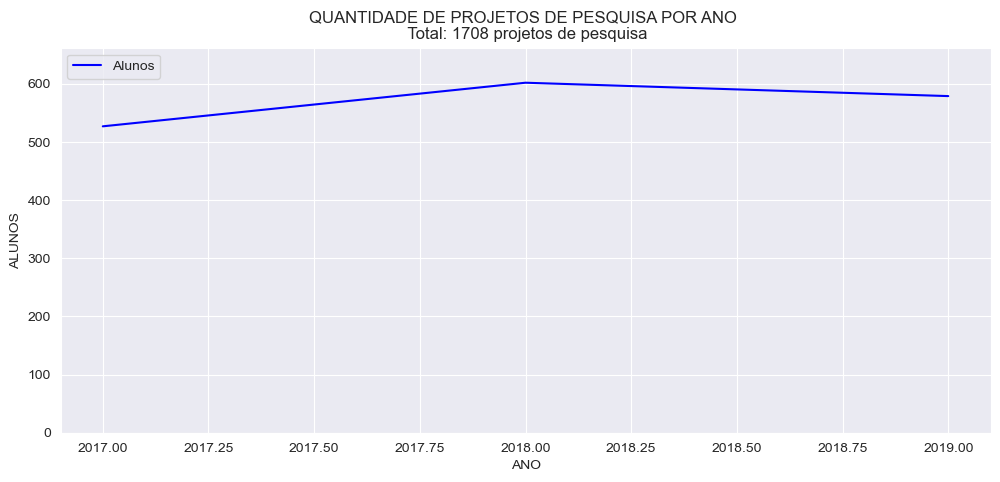

In [91]:
# Criando um gráfico de progressão para analisar números de projetos de pesquisa por ano
# Configurações de estilo do seaborn
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Agrupa os dados por ano e soma as contagens
data_pesquisa = etapa_copy.groupby('Ano')['Contagem'].sum().reset_index()

# Plota o gráfico utilizando o seaborn
plt.figure(figsize=(12,5))
sns.lineplot(x="Ano", y="Contagem", data=data_pesquisa, color='blue')

# Título e labels dos eixos
plt.title('QUANTIDADE DE PROJETOS DE PESQUISA POR ANO \n Total: ' + str(etapa_copy['Contagem'].sum()) + ' projetos de pesquisa')
plt.xlabel('ANO')
plt.ylabel('ALUNOS')

# Adiciona legenda e define limites dos eixos
plt.legend(['Alunos'], loc='upper left')
plt.ylim(0, data_pesquisa['Contagem'].max()*1.1)

# Exibe o gráfico
plt.show()

In [90]:
# Quantidade de alunos que receberam ou recebem bolsa renumerada
bolsarenumerada = projetos[projetos['Bolsista'].isin(df_um['Bolsista'])]['Contagem'].sum()

# Quantidade de alunos que receberam ou recebem bolsa alimentação
bolsaalimentacao = projetos[projetos['Bolsista'].isin(df_seis['Nome'])]['Contagem'].sum()

# Quantidade de alunos que receberam ou recebem bolsa transporte
bolsatransporte = projetos[projetos['Bolsista'].isin(df_sete['Nome'])]['Contagem'].sum()

# Quantidade de alunos que receberam ou recebem bolsa moradia
bolsamoradia = projetos[projetos['Bolsista'].isin(df_oito['Nome'])]['Contagem'].sum()

# Exibindo os resultados
print("Bolsa Remunerada: {}".format(bolsarenumerada))
print("Bolsa Alimentação: {}".format(bolsaalimentacao))
print("Bolsa Transporte: {}".format(bolsatransporte))
print("Bolsa Moradia: {}".format(bolsamoradia))

Bolsa Remunerada: 1007
Bolsa Alimentação: 917
Bolsa Transporte: 133
Bolsa Moradia: 143


### Segunda Questão Norteadora

Para responder a questão, será necessário juntar informações de diferentes dataframes. Inicialmente, serão utilizados a relação de bolsistas de Iniciação Científica, bolsistas de projetos de extensão e pesquisa, voluntários de projetos de extensão e pesquisa e também alunos de graduação que realizam projetos de pesquisa.

In [76]:
# Juntando voluntarios de projetos de extensão com bolsistas de IC
parcial = pd.merge(df, df_quatro, left_on='Bolsista', right_on='Nome')
parcial = parcial.drop_duplicates() # remoção de linhas repetidas
total_parcial = parcial.drop_duplicates(subset='Bolsista') #remoção de nomes repetidos
parcial_copy = total_parcial.copy() #copiando dataframe para evitar erros de compilação

#Excluindo colunas desnecessárias na análise de dados
parcial_copy.drop(['Contagem_x', 'Nome', 'Curso_y', 'Departamento_y','Data de Inicio', 'Data Fim'], axis=1, inplace=True)

#Renomeando o dataframe obtido
parcial_copy.columns = ['Bolsista','Curso','Ano','Departamento','Fomento','Tipo de Aluno','Unidade','Contagem']
parcial.dropna(inplace = True)

#Imprimindo a relação de alunos
parcial_copy

,Bolsista,Curso,Ano,Departamento,Fomento,Tipo de Aluno,Unidade,Contagem
0,GIOVANNA MONTEIRO LOPES,LETRAS,2017,DELET,UFOP,VOLUNTÁRIO,IFAC,1
1,HYGOR CORDEIRO FONTES,EDUCACAO FISICA,2017,CEDUFOP,UFOP,VOLUNTÁRIO,IFAC,1
4,KARINA BORGES DE SOUZA DA SILVA,NUTRICAO,2017,DECBI,FAPEMIG,BOLSISTA,IFAC,1
6,LUCAS RESENDE DUTRA SOUSA,FARMACIA,2017,DECBI,UFOP,BOLSISTA,IFAC,1
10,LUIZA DE ARAUJO DIAS,NUTRICAO,2017,DENCS,UFOP,BOLSISTA,IFAC,1
...,...,...,...,...,...,...,...,...
544,DANILO CESAR SILVA SOARES,CIENCIA DA COMPUTACAO,2021,DECOM,CNPQ,BOLSISTA,ICEB,1
545,JOAO VICTOR ZULATO MARTINS,ENGENHARIA DE COMPUTACAO,2021,DECEA,UFOP,VOLUNTÁRIO,ICEA,1
547,MARCOS VINICIUS MORAIS MOREIRA,DIREITO,2021,DEDIR,UFOP,BOLSISTA,EDTM,1
548,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,2021,DEEDU,CNPQ,BOLSISTA,IFAC,1


In [77]:
# Juntando bolsistas de projetos de extensão com bolsistas de IC
parcial_um = pd.merge(df, df_cinco, left_on='Bolsista', right_on='Nome')
parcial_um = parcial_um.drop_duplicates() # remoção de linhas repetidas
total_parcial_um = parcial_um.drop_duplicates(subset='Bolsista') #remoção de nomes repetidos
parcial_um_copy = total_parcial_um.copy() #copiando dataframe para evitar erros de compilação

#Excluindo colunas desnecessárias na análise de dados
parcial_um_copy.drop(['Contagem_x', 'Nome', 'Curso_y', 'Departamento_y','Data de Inicio', 'Data Fim'], axis=1, inplace=True)

#Renomeando o dataframe obtido
parcial_um_copy.columns = ['Bolsista','Curso','Ano','Departamento','Fomento','Tipo de Aluno','Unidade','Contagem']
parcial_um_copy.dropna(inplace = True)

#Imprimindo a relação de alunos
parcial_um_copy

,Bolsista,Curso,Ano,Departamento,Fomento,Tipo de Aluno,Unidade,Contagem
0,ALINE GONCALVES DE MEDEIROS,LETRAS,2017,DELET,CNPQ,BOLSISTA,IFAC,1
1,ALLISSA PERDIGAO BRAGA,LETRAS,2017,DELET,CNPQ,BOLSISTA,IFAC,1
4,ANA CLARA LOPES BORGES,MUSEOLOGIA,2017,DEMUL,UFOP,VOLUNTÁRIO,IFAC,1
11,ANAYS CRISTINA GUIMARAES DIAS,ENGENHARIA DE MINAS,2017,DEMIN,FAPEMIG,BOLSISTA,IFAC,1
12,ANNA FLAVIA MATOS SOARES,FARMACIA,2017,DEFAR,FAPEMIG,BOLSISTA,IFAC,1
...,...,...,...,...,...,...,...,...
1071,MARCOS VINICIUS MORAIS MOREIRA,DIREITO,2021,DEDIR,UFOP,BOLSISTA,EDTM,1
1072,FABIO JUNIOR ROCHA VIANNA,CIENCIAS ECONOMICAS,2021,DEECO,UFOP,VOLUNTÁRIO,ICSA,1
1073,VICTORIA SILVA E OLIVEIRA,JORNALISMO,2021,DEFIS,UFOP,VOLUNTÁRIO,ICEB,1
1076,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,DEEDU,UFOP,BOLSISTA,IFAC,1


In [78]:
# Concatenando resultados parciais para identificar bolsistas e voluntários dos projetos de extensão da UFOP
extensao = pd.concat([parcial_copy, parcial_um_copy])
extensao = extensao.drop_duplicates() # Removendo linhas repetidas
extensao.dropna(inplace = True)
extensao

,Bolsista,Curso,Ano,Departamento,Fomento,Tipo de Aluno,Unidade,Contagem
0,GIOVANNA MONTEIRO LOPES,LETRAS,2017,DELET,UFOP,VOLUNTÁRIO,IFAC,1
1,HYGOR CORDEIRO FONTES,EDUCACAO FISICA,2017,CEDUFOP,UFOP,VOLUNTÁRIO,IFAC,1
4,KARINA BORGES DE SOUZA DA SILVA,NUTRICAO,2017,DECBI,FAPEMIG,BOLSISTA,IFAC,1
6,LUCAS RESENDE DUTRA SOUSA,FARMACIA,2017,DECBI,UFOP,BOLSISTA,IFAC,1
10,LUIZA DE ARAUJO DIAS,NUTRICAO,2017,DENCS,UFOP,BOLSISTA,IFAC,1
...,...,...,...,...,...,...,...,...
1069,BARBARA ARAUJO PEREIRA,ENGENHARIA DE PRODUCAO,2021,DEPRO,UFOP,BOLSISTA,EMINAS,1
1072,FABIO JUNIOR ROCHA VIANNA,CIENCIAS ECONOMICAS,2021,DEECO,UFOP,VOLUNTÁRIO,ICSA,1
1073,VICTORIA SILVA E OLIVEIRA,JORNALISMO,2021,DEFIS,UFOP,VOLUNTÁRIO,ICEB,1
1076,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,DEEDU,UFOP,BOLSISTA,IFAC,1


In [79]:
# Concatenando alunos de extensão com alunos de pesquisa para gerar a relação final de alunos da UFOP
resultado = pd.concat([extensao, df_dois])
resultado = resultado.drop_duplicates() # Removendo linhas repetidas
resultado_final = resultado.drop_duplicates(subset='Bolsista') #remoção de nomes repetidos
resultado_copy = resultado_final.copy() #copiando dataframe para evitar erros de compilação

#Excluindo colunas e linhas desnecessárias na análise de dados
resultado_copy.drop(['Situação', 'Data de Inicio', 'Data Fim', 'Natureza','Aluno de Graduação', 'Aluno de Pós - Graduação'], axis=1, inplace=True)
resultado_copy.dropna(inplace = True)

#Imprimindo a relação de alunos
resultado_copy

,Bolsista,Curso,Ano,Departamento,Fomento,Tipo de Aluno,Unidade,Contagem
0,GIOVANNA MONTEIRO LOPES,LETRAS,2017,DELET,UFOP,VOLUNTÁRIO,IFAC,1
1,HYGOR CORDEIRO FONTES,EDUCACAO FISICA,2017,CEDUFOP,UFOP,VOLUNTÁRIO,IFAC,1
4,KARINA BORGES DE SOUZA DA SILVA,NUTRICAO,2017,DECBI,FAPEMIG,BOLSISTA,IFAC,1
6,LUCAS RESENDE DUTRA SOUSA,FARMACIA,2017,DECBI,UFOP,BOLSISTA,IFAC,1
10,LUIZA DE ARAUJO DIAS,NUTRICAO,2017,DENCS,UFOP,BOLSISTA,IFAC,1
...,...,...,...,...,...,...,...,...
1069,BARBARA ARAUJO PEREIRA,ENGENHARIA DE PRODUCAO,2021,DEPRO,UFOP,BOLSISTA,EMINAS,1
1072,FABIO JUNIOR ROCHA VIANNA,CIENCIAS ECONOMICAS,2021,DEECO,UFOP,VOLUNTÁRIO,ICSA,1
1073,VICTORIA SILVA E OLIVEIRA,JORNALISMO,2021,DEFIS,UFOP,VOLUNTÁRIO,ICEB,1
1076,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,DEEDU,UFOP,BOLSISTA,IFAC,1


<div class="alert alert-block alert-info"
     <b> 684 alunos da Universidade Federal de Ouro Preto realizaram ou realizam projetos de pesquisa ou projetos de extensão. </b>
</div>

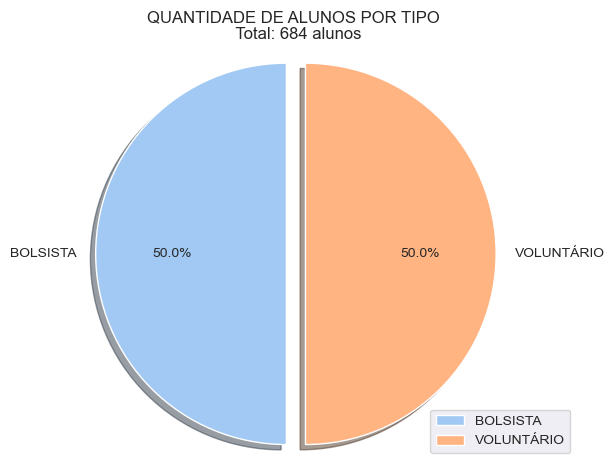

In [80]:
# Agrupando por tipo de aluno e somando a contagem
tipo_aluno = resultado_copy.groupby('Tipo de Aluno')['Contagem'].sum()

# Criando uma lista de valores de "explode" para destacar a primeira fatia
explode = [0.1 if i == 0 else 0 for i in range(len(tipo_aluno))]

# Armazenando o valor total de alunos em uma variável
total_alunos = resultado_copy['Contagem'].sum()

# Gerando o gráfico de pizza com algumas opções adicionais
sns.set_palette("pastel")
plt.pie(tipo_aluno, labels=tipo_aluno.index, autopct='%1.1f%%', 
        startangle=90, explode=explode, shadow=True)
plt.axis('equal')

# Adicionando a legenda das cores
plt.legend(loc='lower right', labels=tipo_aluno.index)

# Adicionando o título e o valor total de alunos
plt.title(f'QUANTIDADE DE ALUNOS POR TIPO \n Total: {total_alunos} alunos')

plt.tight_layout() # centraliza o gráfico

# Exibindo o gráfico
plt.show()

<div class="alert alert-block alert-info"
     <b> 342 alunos são bolsistas e 342 alunos são voluntários. </b>
</div>

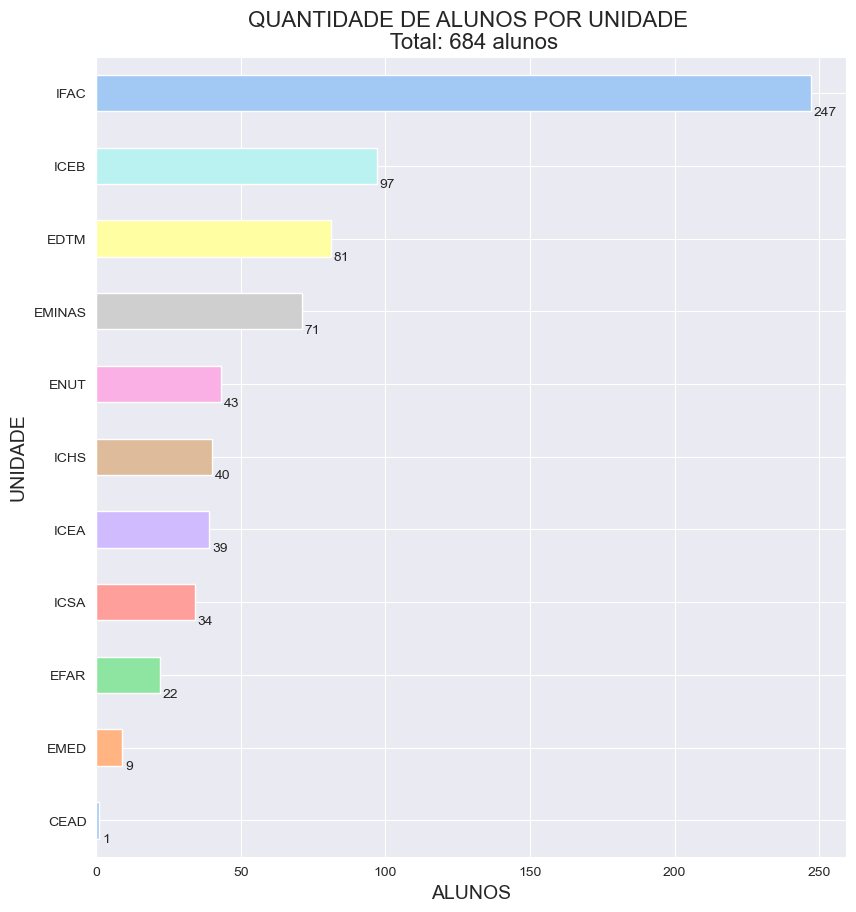

In [81]:
# Gráfico para mostrar bolsistas e voluntários da UFOP por Unidade
# Definindo a paleta de cores
palette = sns.color_palette("pastel", len(resultado_copy['Unidade'].unique()))

# Utilizando o estilo "seaborn"
sns.set_style('darkgrid')

# Criando o gráfico de barras com as cores da paleta definida
unidade = resultado_copy.groupby('Unidade')['Contagem'].sum().sort_values().plot(kind='barh', color=palette, figsize=(10,10))

# Adicionando as anotações nos retângulos
for p in unidade.patches:
    b = p.get_bbox()
    unidade.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

# Personalizando o gráfico
plt.title('QUANTIDADE DE ALUNOS POR UNIDADE \n Total: ' + str(resultado_copy['Contagem'].sum()) + ' alunos', fontsize=16)
plt.ylabel('UNIDADE', fontsize=14)
plt.xlabel('ALUNOS', fontsize=14)

# Ajustando o espaçamento
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.95, top=0.9, wspace=0.2, hspace=0.2)

# Exibindo o gráfico
plt.show()

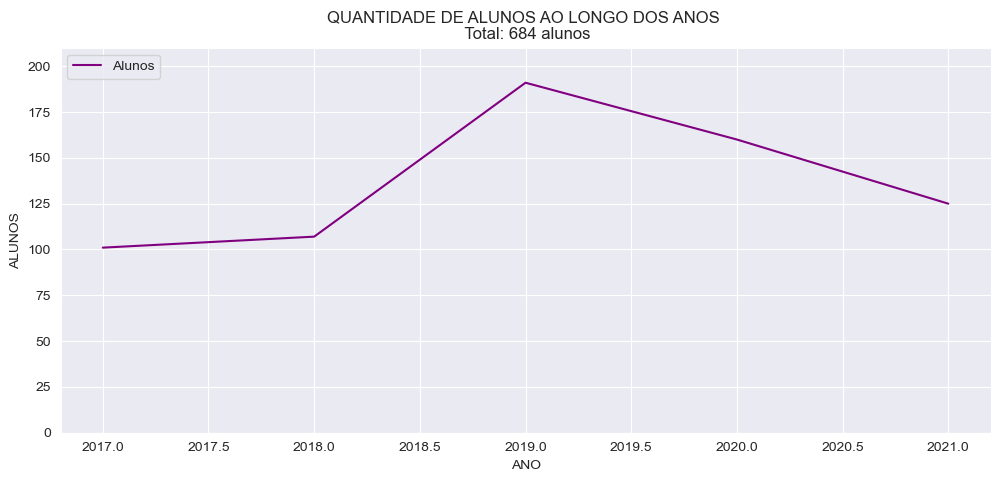

In [82]:
# Criando um gráfico de progressão para analisar alunos bolsistas e voluntários da UFOP por ano
# Configurações de estilo do seaborn
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Agrupa os dados por ano e soma as contagens
data = resultado_copy.groupby('Ano')['Contagem'].sum().reset_index()

# Plota o gráfico utilizando o seaborn
plt.figure(figsize=(12,5))
sns.lineplot(x="Ano", y="Contagem", data=data, color='purple')

# Título e labels dos eixos
plt.title('QUANTIDADE DE ALUNOS AO LONGO DOS ANOS \n Total: ' + str(resultado_copy['Contagem'].sum()) + ' alunos')
plt.xlabel('ANO')
plt.ylabel('ALUNOS')

# Adiciona legenda e define limites dos eixos
plt.legend(['Alunos'], loc='upper left')
plt.ylim(0, data['Contagem'].max()*1.1)

# Exibe o gráfico
plt.show()

In [83]:
# Quantidade de voluntários e bolsistas da UFOP que receberam ou recebem bolsa renumerada
bolsa_renumerada = resultado_copy[resultado_copy['Bolsista'].isin(df_um['Bolsista'])]['Contagem'].sum()

# Quantidade de voluntários e bolsistas da UFOP que receberam ou recebem bolsa alimentação
bolsa_alimentacao = resultado_copy[resultado_copy['Bolsista'].isin(df_seis['Nome'])]['Contagem'].sum()

# Quantidade de voluntários e bolsistas da UFOP que receberam ou recebem bolsa transporte
bolsa_transporte = resultado_copy[resultado_copy['Bolsista'].isin(df_sete['Nome'])]['Contagem'].sum()

# Quantidade de voluntários e bolsistas da UFOP que receberam ou recebem bolsa moradia
bolsa_moradia = resultado_copy[resultado_copy['Bolsista'].isin(df_oito['Nome'])]['Contagem'].sum()

# Exibindo os resultados
print("Bolsa Remunerada: {}".format(bolsa_renumerada))
print("Bolsa Alimentação: {}".format(bolsa_alimentacao))
print("Bolsa Transporte: {}".format(bolsa_transporte))
print("Bolsa Moradia: {}".format(bolsa_moradia))

Bolsa Remunerada: 307
Bolsa Alimentação: 275
Bolsa Transporte: 24
Bolsa Moradia: 79


<div class="alert alert-block alert-info"
     <b> 307 alunos recebem ou receberam alguma bolsa da Universidade Federal de Ouro Preto, 275 alunos recebem ou receberam bolsa alimentação, 24 recebem ou receberam bolsa transporte e 79 recebem ou receberam bolsa moradia.</b>
</div>

### Terceira Questão Norteadora

Para responder a questão, será necessário analisar de forma detalhada o Dataframe Alunos de Pós - Graduação. As modelagens das questões anteriores também são premissa para a resposta da questão.

In [106]:
# Concatenando modelagens anteriores para ajudar na resolução da questão norteadora
passo = pd.concat([resultado_copy, projetos])
passo = passo.drop_duplicates() # Removendo linhas repetidas
passo = passo.drop_duplicates(subset='Bolsista') #remoção de nomes repetidos
passo[['Bolsista', 'Curso']]

,Bolsista,Curso
0,GIOVANNA MONTEIRO LOPES,LETRAS
1,HYGOR CORDEIRO FONTES,EDUCACAO FISICA
4,KARINA BORGES DE SOUZA DA SILVA,NUTRICAO
6,LUCAS RESENDE DUTRA SOUSA,FARMACIA
10,LUIZA DE ARAUJO DIAS,NUTRICAO
...,...,...
27647,ISADORA NUNES BRITO,MEDICINA
27835,DIEGO ABREU PEREIRA,EDUCACAO FISICA
27843,VINICIUS MOURA DE CASTRO,MEDICINA
27900,JORDANA FEDRIGO MENEZES,NUTRICAO


In [109]:
# Comparando o resultado obtido com o dataframe de alunos de pós - graduação
passo_um = pd.merge(passo, df_tres, left_on='Bolsista', right_on='Nome')
passo_um = passo_um.drop_duplicates() # remoção de linhas repetidas
passo_um = passo_um.drop_duplicates(subset='Bolsista') #remoção de nomes repetidos
passo_um_copy = passo_um.copy() #copiando dataframe para evitar erros de compilação

#Imprimindo a relação de alunos
passo_um_copy[['Bolsista', 'Curso', 'Nível', 'Data de Ingresso', 'Data de Defesa']]

,Bolsista,Curso,Nível,Data de Ingresso,Data de Defesa
0,LUCAS RESENDE DUTRA SOUSA,FARMACIA,MESTRADO ACADÊMICO,03/08/2021,NÃO REGISTRADO
1,LARA GERALDA MAGELA DOS SANTOS VIEIRA,NUTRICAO,MESTRADO ACADÊMICO,08/11/2021,NÃO REGISTRADO
2,BIANCA ALVES ALMEIDA MACHADO,MEDICINA,DOUTORADO,07/04/2020,NÃO REGISTRADO
4,DIONE DA COSTA OLIVEIRA,FISICA,MESTRADO ACADÊMICO,11/03/2021,NÃO REGISTRADO
5,ALLISSA PERDIGAO BRAGA,LETRAS,MESTRADO ACADÊMICO,26/02/2019,25/08/2021
...,...,...,...,...,...
201,DAIANE TEIXEIRA DE OLIVEIRA,FARMACIA ...,DOUTORADO,01/04/2016,27/03/2020
203,MARCUS VINICIUS ALVES CARNEIRO GOMES,DIREITO ...,MESTRADO ACADÊMICO,29/03/2021,NÃO REGISTRADO
204,CRISTIAN JUNIOR DAMASCENO,QUIMICA ...,MESTRADO PROFISSIONAL,15/01/2018,11/03/2021
205,VIVIANE FLORES XAVIER,FARMACIA ...,DOUTORADO,02/03/2020,NÃO REGISTRADO


<div class="alert alert-block alert-info"
     <b> 193 alunos de graduação da UFOP que receberam ou recebem bolsa de extensão ou/e pesquisa entraram na pós - graduação. </b>
</div>

## Conclusões